
**DRIVER IMPORT**

All python packeges useful for the project execution are set here and must be run firstly

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
import random
import pathlib
import imageio
import glob
import csv  
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dropout
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2 
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import cifar10 # importing the dataset
from keras import backend as K 
from keras.utils import np_utils
from keras.layers import Layer
import keras.backend as K
import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten
from sklearn.utils import class_weight
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(42)
!pip install keras-tuner --upgrade

import keras_tuner as kt

from matplotlib import style
style.use('fivethirtyeight')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00


**GOOGLE DRIVE SET UP**

In [2]:
# path per train e test
drive.mount('/content/drive',force_remount=True)
data_dir = '/content/drive/MyDrive/NEURALNETWORK/DatasetNN'
train= '/content/drive/MyDrive/NEURALNETWORK/DatasetNN/train'
print("Train directory read correctly!")
test = '/content/drive/MyDrive/NEURALNETWORK/DatasetNN/test'
print("Test directory read correctly!")

Mounted at /content/drive
Train directory read correctly!
Test directory read correctly!


**CLASS LABELS**

In [3]:
classes = { 0:'0L',1:'1L', 2:'2L', 3:'3L', 4:'4L', 5:'5L', 6:'0R', 7:'1R', 8:'2R', 9:'3R', 10:'4R',11:'5R' }

**SOME PARAMETERS**

In [4]:
batch_size = 32
img_height = 128
img_width = 128

**TRAINING SET**

The code below uses the image_dataset_from_directory function from TensorFlow's keras.utils module to create a dataset for training a deep learning model. The function takes the path to the directory containing the training images as the train argument. The validation_split argument specifies the fraction of images to be used for validation, with 0.2 in this case meaning 20% of the images will be used for validation and 80% will be used for training. The subset argument is set to "training" to indicate that the dataset created is for training. The seed argument is a random seed for the data splitting process and image_size specifies the size to which the images will be resized, with img_height and img_width as the desired height and width respectively



> For train,test and validation **images_from_directory** method was used. Here some advantages:
- Convenience: The images_from_directory method provides a convenient way to create a dataset from a directory of images without having to manually split the data into training and validation sets.
- Automated Labeling: The function automatically labels each image based on the subdirectory it resides in, making it easier to work with multi-class image classification tasks.
- Image Preprocessing: The method provides support for image preprocessing and data augmentation, which are important steps in preparing image data for training deep learning models.
- Performance: The function uses TensorFlow's efficient tensor operations, which can lead to faster data loading and preprocessing compared to using numpy arrays.


Making some tries with the standard method train_test_split and usinG arrays to append images and labels Colab went out of memory (12.7 GB) while now RAM is alwayn on 2.5 GB line and the splitting is done in around 2 seconds.


In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width))

Found 18000 files belonging to 12 classes.
Using 14400 files for training.


In [6]:
class_names = train_ds.class_names
print(class_names)

['0L', '0R', '1L', '1R', '2L', '2R', '3L', '3R', '4L', '4R', '5L', '5R']


**VALIDATION SET**

The code below uses the image_dataset_from_directory function to create a validation dataset for a deep learning model. It is similar to the code for creating the training dataset, with a few differences:

subset argument: This time it is set to "validation" to indicate that the dataset created is for validation.

batch_size argument: This argument specifies the number of images in each batch of data.

The validation_split argument remains unchanged, with a value of 0.2, meaning that 20% of the images will be used for validation. The seed argument and image_size argument have the same values as in the training dataset code.

In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18000 files belonging to 12 classes.
Using 3600 files for validation.


**TEST SET**

This code uses the image_dataset_from_directory function to create a test dataset for a deep learning model. It is similar to the code for creating the training and validation datasets, with a few differences:

validation_split argument: This argument is set to None, which means that no validation split will be performed and all the images in the directory will be used for testing.

subset argument: This argument is not present in this code, as it's not needed for the test dataset.

The batch_size argument specifies the number of images in each batch of data, and the seed argument and image_size argument have the same values as in the training and validation dataset codes.


In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  validation_split=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3600 files belonging to 12 classes.


**PLOT SOME IMAGES-LABELS**


The code below creates a plot with a figure size of (10, 10) using the plt.figure function. Then, it loops over the first batch of data in train_ds using train_ds.take(1), which contains images and labels. For each iteration of the inner loop, it plots an image from the batch using plt.imshow, and sets the title of the plot to the class name of the image using the plt.title function and class_names[labels[i]]. The plt.axis("off") function turns off the axis for each plot. The subplot is defined using plt.subplot with 3 rows and 3 columns, and the current plot is specified using i + 1.

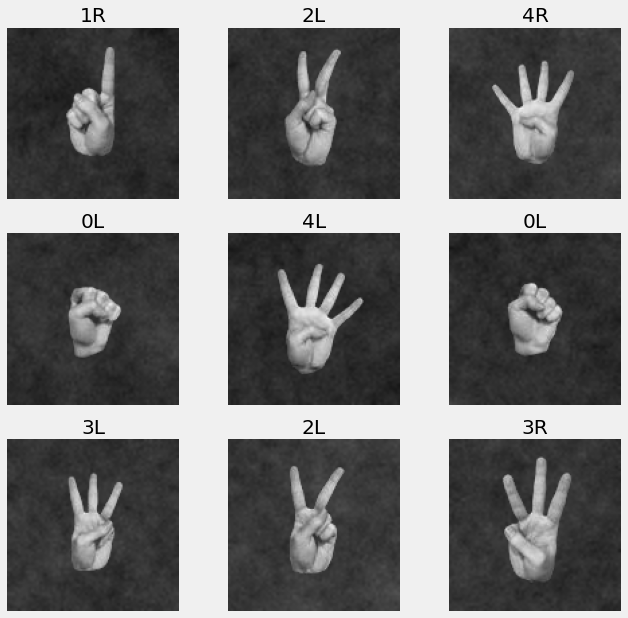

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**SOME COMPUTATIONAL OPTIMIZATION**


tf.data builds a performance model of the input pipeline and runs an optimization algorithm to find a good allocation of its CPU budget across all parameters specified as AUTOTUNE. While the input pipeline is running, tf.data tracks the time spent in each operation, so that these times can be fed into the optimization algorithm.
These are two important methods to use when loading data:
- **Dataset.cache** keeps the images in memory after they have been loaded from disk during the first epoch. This will ensure that the dataset does not become a bottleneck when training the model. If your dataset is too large to be contained in memory, you can also use this method to create a performant disk cache.
- **Dataset.prefetch** overlaps data preprocessing and model execution during training.


In [10]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### **FIRST IMPLEMENTATION: MINST ARCHITECTURE (from scratch)**

Sections
1.   CNN implementation
2.   Results plot
3.   Explainabiliy of the model

# **1. CNN IMPLEMENTATION**
This code defines a sequential model with several Conv2D, MaxPooling2D, Flatten and Dense layers. The input shape of the first Conv2D layer is specified as (128, 128, 3), meaning the input will be an image with 128 rows, 128 columns, and 3 color channels. The activation function used in all Conv2D layers is "relu". The model's architecture is summarized with the model.summary() method.
Some data augmentation was done at the very beginning of the network setup in particular  5 layers of data augumentation were inserted (Rescaling,Flipping,Cropping,Zooming).
Augmentation with the Dropout layer will avoid overfitting situations.

In [59]:
num_classes = len(class_names)
model = keras.models.Sequential()
model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(keras.layers.RandomRotation(0.2))
model.add(keras.layers.RandomZoom(0.5,fill_mode='reflect',interpolation='bilinear'))
model.add(keras.layers.Conv2D(filters=32,kernel_size=2,activation='relu', input_shape = [128, 128,3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(150,activation='relu'))
model.add(keras.layers.Dense(12,activation='softmax'))

In [60]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', verbose=1,patience=10,mode='max', restore_best_weights=True)

In [61]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 random_rotation_8 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_9 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 127, 127, 32)      416       
                                                                 
 batch_normalization_28 (Bat  (None, 127, 127, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 32)     

In [63]:
epochs=15
history = model.fit(train_ds,batch_size=32,validation_data=val_ds,epochs=epochs,verbose = 1,callbacks=[early_stopping])

Epoch 1/15
450/450 [==============================] - 569s 1s/step - loss: 1.2336 - accuracy: 0.5818 - val_loss: 5.4959 - val_accuracy: 0.1589
Epoch 2/15
450/450 [==============================] - 569s 1s/step - loss: 0.2035 - accuracy: 0.9292 - val_loss: 1.0565 - val_accuracy: 0.6931
Epoch 3/15
450/450 [==============================] - 578s 1s/step - loss: 0.1342 - accuracy: 0.9525 - val_loss: 0.0282 - val_accuracy: 0.9878
Epoch 4/15
450/450 [==============================] - 581s 1s/step - loss: 0.1234 - accuracy: 0.9567 - val_loss: 1.2219 - val_accuracy: 0.7203
Epoch 5/15
450/450 [==============================] - 570s 1s/step - loss: 0.0825 - accuracy: 0.9703 - val_loss: 0.2240 - val_accuracy: 0.9308
Epoch 6/15
450/450 [==============================] - 582s 1s/step - loss: 0.0848 - accuracy: 0.9710 - val_loss: 0.2657 - val_accuracy: 0.9206
Epoch 7/15
450/450 [==============================] - 589s 1s/step - loss: 0.0859 - accuracy: 0.9722 - val_loss: 0.5697 - val_accuracy: 0.8483

In [64]:
model.save('/content/drive/MyDrive/NEURALNETWORK/Models/MNIST.h5')

In [65]:
test_accuracy = model.evaluate(test_ds)
print('Test Accuracy:', test_accuracy)

113/113 [==============================] - 385s 3s/step - loss: 0.0843 - accuracy: 0.9786
Test Accuracy: [0.08431175351142883, 0.9786111116409302]


## **2. RESULTS PLOT**


> Contents

1.   Epoch-Accuracy plot considering the loss
2.   Confusion Matrix
3.   Area under the ROC Curve for each class
4.   Classication report 


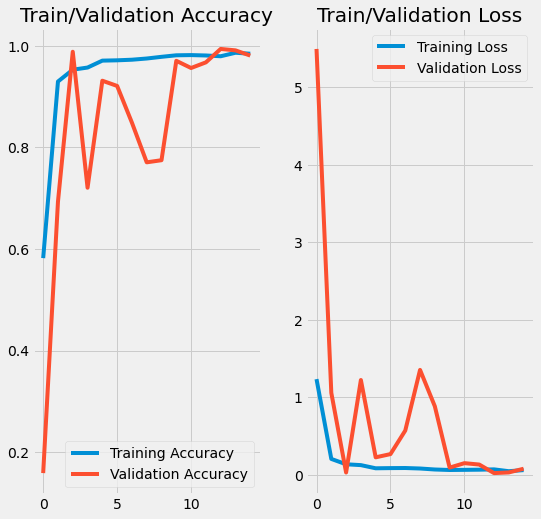

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train/Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train/Validation Loss')
plt.show()

In [4]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/MNIST.h5')

In [26]:
test_probabilities = model.predict(test_ds)
pred=np.argmax(test_probabilities,axis=1)

113/113 [==============================] - 19s 166ms/step


In [28]:
def extract_labels(image, label):
    return label

labels = test_ds.map(extract_labels).unbatch().batch(batch_size)

1/1 [==============================] - 0s 74ms/step


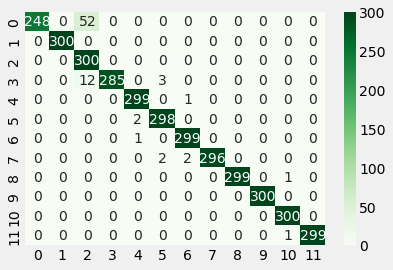

In [34]:
from sklearn.metrics import confusion_matrix

y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels)
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [19]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(correct_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       300
           1       1.00      1.00      1.00       300
           2       0.82      1.00      0.90       300
           3       1.00      0.95      0.97       300
           4       0.99      1.00      0.99       300
           5       0.98      0.99      0.99       300
           6       0.99      1.00      0.99       300
           7       1.00      0.99      0.99       300
           8       1.00      1.00      1.00       300
           9       1.00      1.00      1.00       300
          10       0.99      1.00      1.00       300
          11       1.00      1.00      1.00       300

    accuracy                           0.98      3600
   macro avg       0.98      0.98      0.98      3600
weighted avg       0.98      0.98      0.98      3600



## **3. EXPLEINABILITY OF THE MODEL**

Contents
1.   Visualize intermediate activations
2.   Visualize Convnet filters


1.**Visualizing intermediate activations**

In [20]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/MNIST.h5')

In [21]:
img_path = "/content/drive/MyDrive/NEURALNETWORK/DatasetNN/train/2L/fff79b8e-4d29-4cfa-bba8-687ba60f4e98_2L.png"
img = image.load_img(img_path, target_size=(128,128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)

(1, 128, 128, 3)


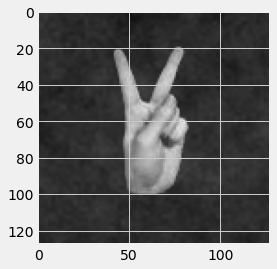

In [22]:
plt.imshow(img_tensor[0].astype('uint8'))
plt.show()

Code below defines a loop over the layers of a Keras model model, and appends the outputs and names of those layers that are either Conv2D or MaxPooling2D instances to the lists layer_outputs and layer_names, respectively. The keras.Model constructor is then called to create a new model called activation_model that has the same input as model and outputs as the selected layer outputs from layer_outputs.

In [23]:
layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(layer.name)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

conv2d_28
max_pooling2d_28
conv2d_29
max_pooling2d_29
conv2d_30
max_pooling2d_30


In [24]:
activations = activation_model.predict(img_tensor)
print(len(activations))
for out in activations:
  print(out.shape)

1/1 [==============================] - 0s 121ms/step
6
(1, 127, 127, 32)
(1, 63, 63, 32)
(1, 62, 62, 64)
(1, 31, 31, 64)
(1, 30, 30, 128)
(1, 15, 15, 128)


In [25]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 127, 127, 32)


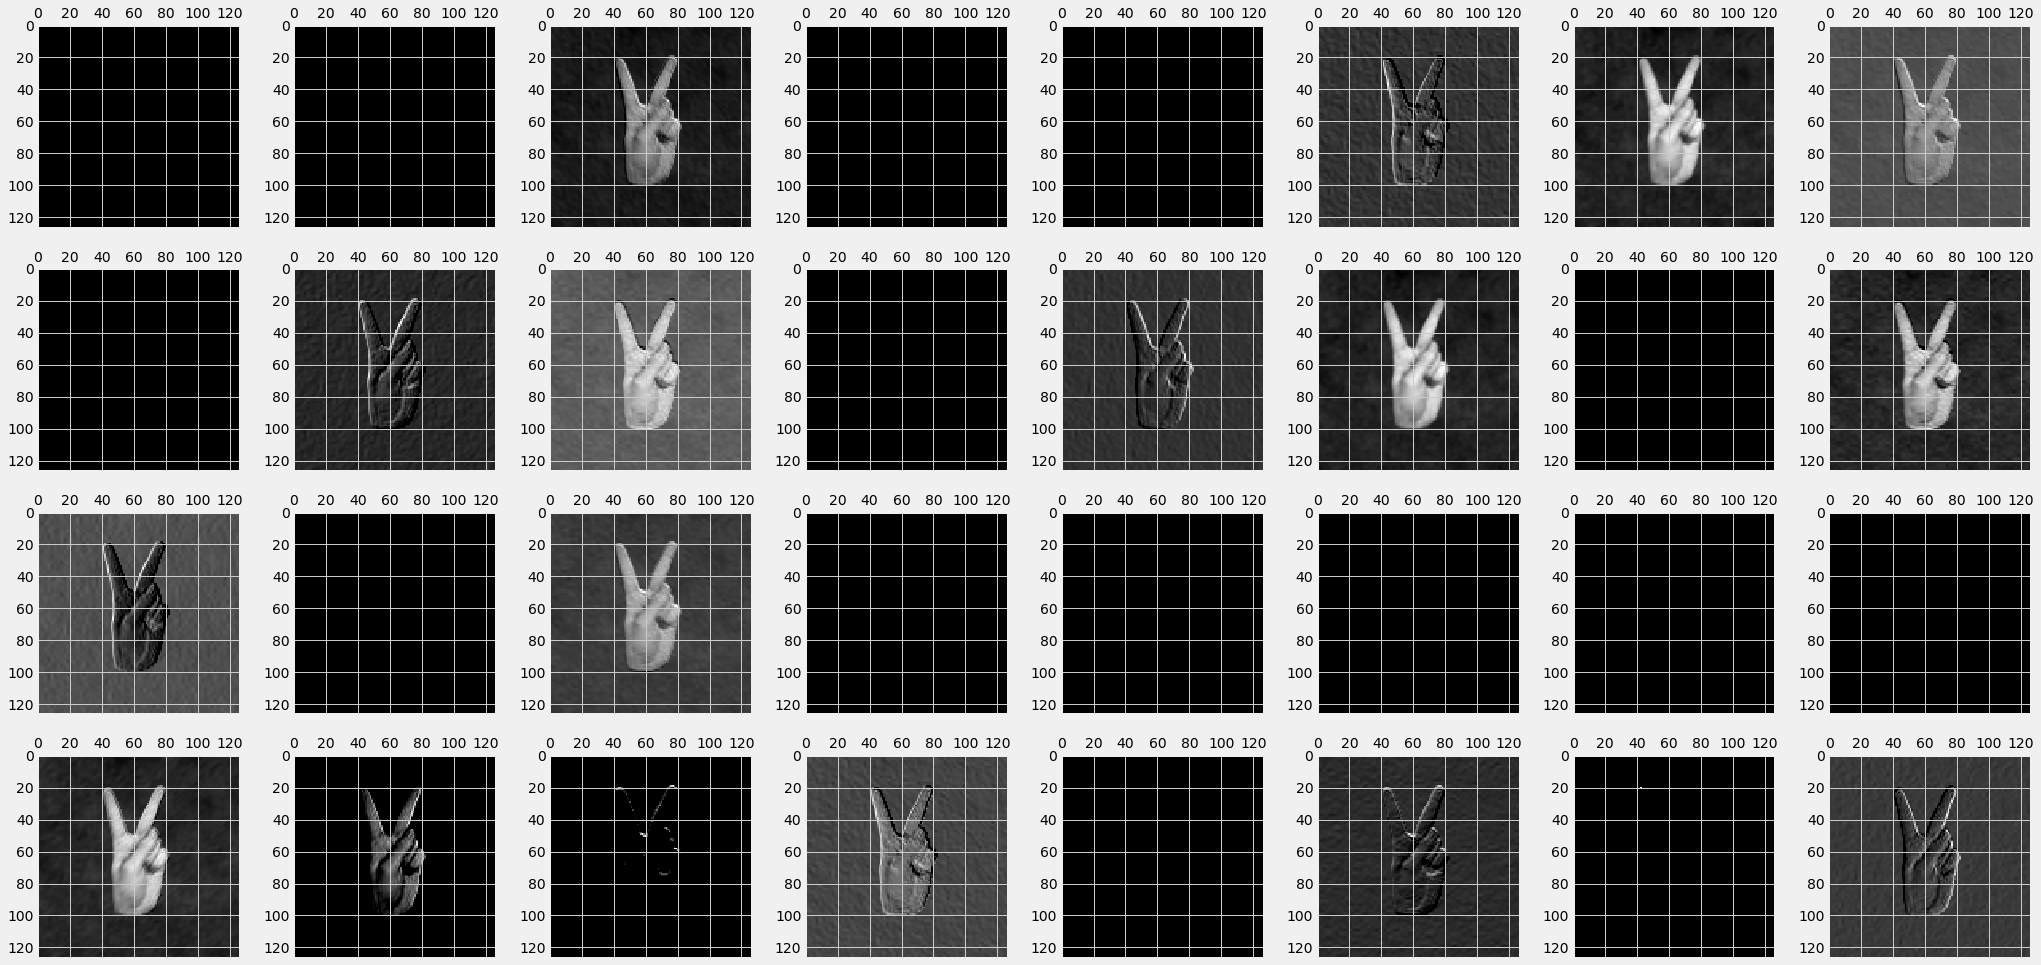

In [26]:
fig, ax = plt.subplots(4, 8, figsize=(32, 16))
for k in range(8):
    ax[0, k].matshow(first_layer_activation[0, :, :, k], cmap='gray')
    ax[1, k].matshow(first_layer_activation[0, :, :, k+8], cmap='gray')
    ax[2, k].matshow(first_layer_activation[0, :, :, k+16], cmap='gray')
    ax[3, k].matshow(first_layer_activation[0, :, :, k+24], cmap='gray')
plt.show()

<ipython-input-27-2f1d60bd545d>:17: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()
<ipython-input-27-2f1d60bd545d>:17: RuntimeWarning: divide by zero encountered in true_divide
  channel_image /= channel_image.std()


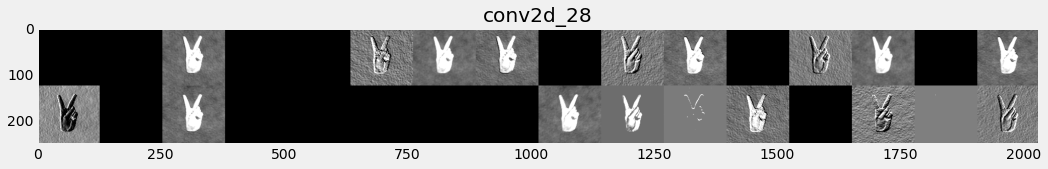

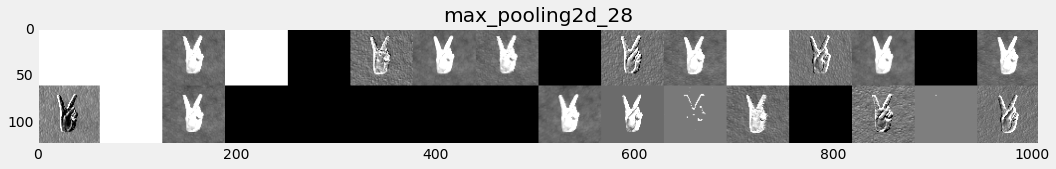

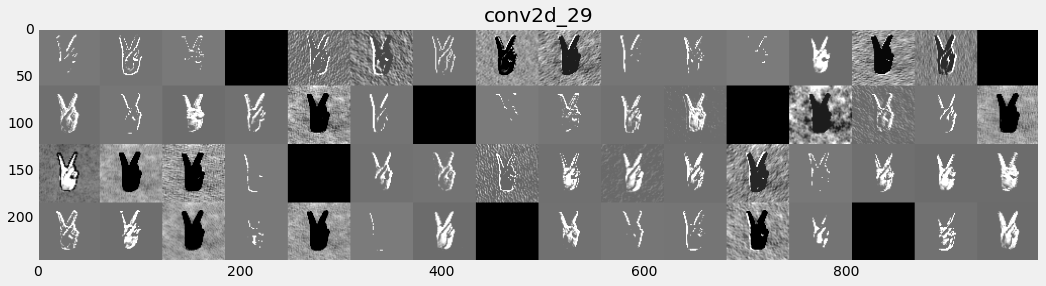

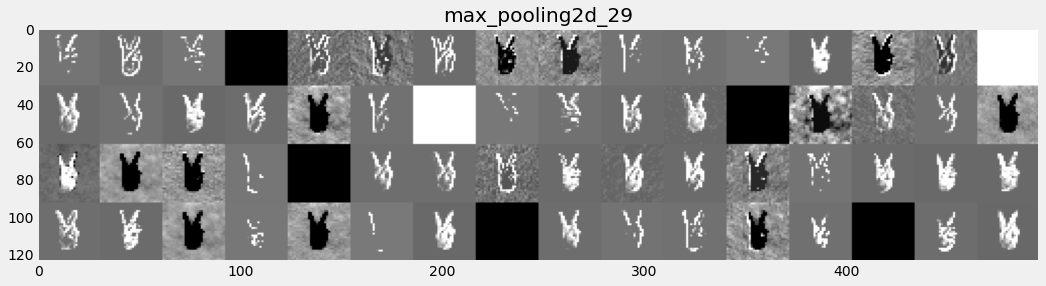

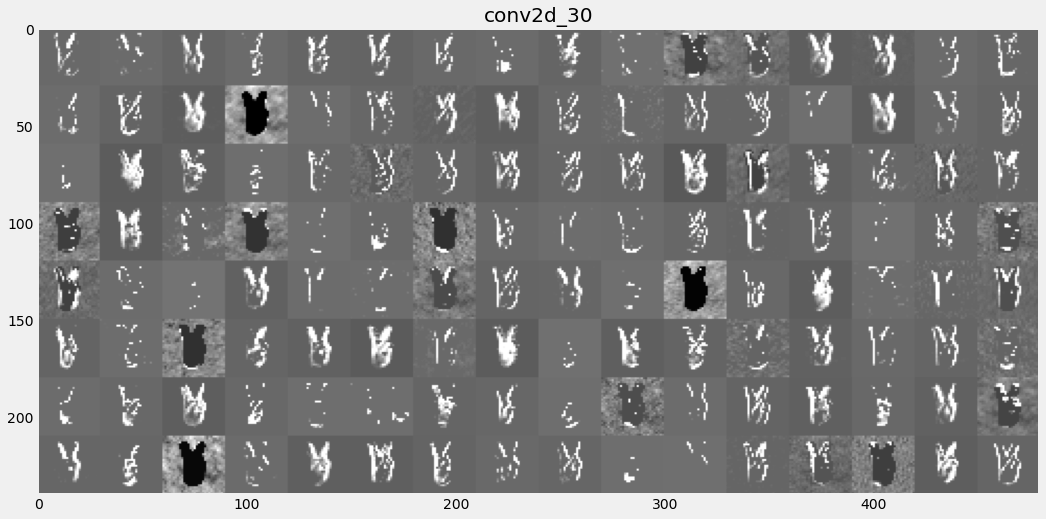

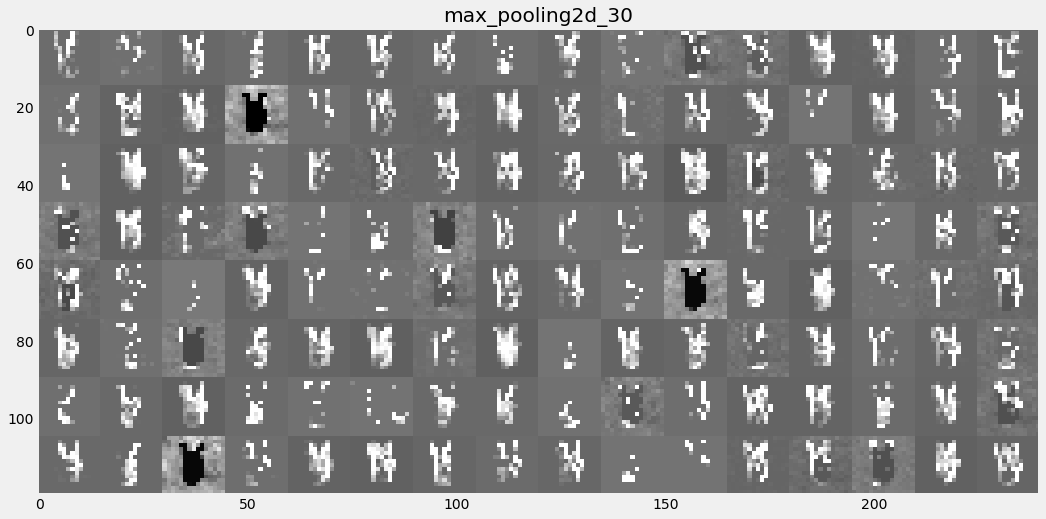

In [27]:
images_per_row = 16
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')
plt.show()

**2. Visualize Convnet filters**

In [31]:
model.summary()

for layer in model.layers:
  if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
    print(layer.name)

layer_name = "conv2d_30"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

# Normalize the pixel values to the range [0, 1]
img_tensor = img_tensor / 255.0

# Subtract the mean pixel value from the image tensor
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img_tensor = (img_tensor - mean) / std


# Pass the preprocessed image tensor to the model for predictions
activation = feature_extractor(img_tensor)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 random_rotation_8 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_9 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 127, 127, 32)      416       
                                                                 
 batch_normalization_28 (Bat  (None, 127, 127, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 32)     

Code below defines a function compute_loss that computes the loss for gradient ascent on an input image tensor. It does this by first getting a specific layer from the model using the layer_name argument and the get_layer method of the model. A feature extractor model is then created using the Keras Model constructor and this layer's output as the output of the new model. The activation of the layer on the input image is then computed using the feature extractor model and stored in the activation variable. The activation values for a specific filter, specified by the filter_index argument, are then selected from the activation tensor and stored in filter_activation. Finally, the mean activation value of the filter is computed using tf.reduce_mean and returned as the result of the function.

In [32]:
def compute_loss(image, layer_name, filter_index):
  ''' compute loss for gradient ascent
  
  image: input image tensor
  layer_name: name of the conv layer we are considering
  filter index: index of the filter we are considering (i.e., feature map of the output of a given conv layer) 
  '''
  layer = model.get_layer(name=layer_name)
  feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)
  activation = feature_extractor(image)
  filter_activation = activation[:, 2:-2, 2:-2, filter_index] # avoid border artifacts
  return tf.reduce_mean(filter_activation) # return mean activation values for the filter

Code below defines a function gradient_ascent_step that performs a single step of gradient ascent on the input image tensor. The function takes as input the image tensor, the name of the layer to perform gradient ascent on, the index of the filter to focus on, and the learning rate.

The function uses TensorFlow's GradientTape to record operations that are performed within its scope. The image tensor is explicitly watched using the tape.watch method, as it is not a TensorFlow Variable and would not be automatically watched in a gradient tape. The loss is then computed using the compute_loss function with the image, layer_name, and filter_index arguments.

Outside the GradientTape scope, the gradients of the loss with respect to the image tensor are computed using tape.gradient and stored in the grads variable. The gradients are then normalized using tf.math.l2_normalize. Finally, the image tensor is updated by adding the product of the learning rate and the normalized gradients to it, and the updated image tensor is returned as the result of the function.

In [33]:
def gradient_ascent_step(image, layer_name, filter_index, learning_rate):
    with tf.GradientTape() as tape: # inside the scope, perform some tensor operations
        tape.watch(image) # Explicitly watch the image tensor, since it isn’t a TensorFlow Variable (only Variables are automatically watched in a gradient tape).
        loss = compute_loss(image, layer_name, filter_index) # how much the current image activates the filter.
    # then, outside the scope, retrieve the gradients based on the "recorded" variables
    grads = tape.gradient(loss, image) # Compute the gradients of the loss with respect to the image.
    grads = tf.math.l2_normalize(grads) # gradient normalization trick
    image += learning_rate * grads # Move the image a little bit in a direction that activates our target filter more strongly.
    return image

In [34]:
img_width = 128
img_height = 128

def generate_filter_pattern(layer_name, filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform( # initialize an image tensor with random values in the range centered in 0.5
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, 3))
    for i in range(iterations):
        image = gradient_ascent_step(image, layer_name, filter_index, learning_rate)
    return image[0].numpy()

Code belowdefines a function deprocess_image which takes an image tensor as input and returns a processed image. The purpose of the processing is to bring the image data back to a format that is displayable.

The function subtracts the mean of the image tensor, then divides it by the standard deviation, multiplies it by 64, adds 128 and clips the pixel values between 0 and 255. Finally, it removes 25 pixels from each border of the image to avoid border artifacts. The result is then cast to an unsigned 8-bit integer and returned.

In [35]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :] #avoid border artifacts
    return image

In [36]:
all_images = []
for filter_index in range(16):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(
        generate_filter_pattern(layer_name, filter_index)
    )
    all_images.append(image)

margin = 5
n = 4
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


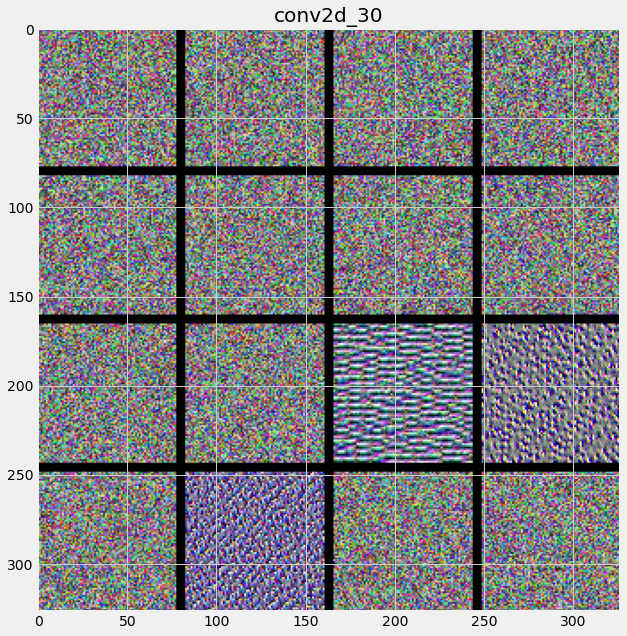

In [37]:
plt.figure(figsize=(10, 10))
plt.title(layer_name)
plt.imshow(stitched_filters.astype("uint8"))
plt.show()

### **1. SECOND IMPLEMENTATION: MINST ARCHITECTURE (from scratch)**

Sections
1.   CNN implementation
2.   Results plot
3.   Explainabiliy of the model

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(keras.layers.RandomRotation(0.2))
model.add(keras.layers.RandomZoom(0.5,fill_mode='reflect',interpolation='bilinear'))
model.add(keras.layers.Conv2D(filters=32,kernel_size=2,activation='relu', input_shape = [128, 128,3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64,kernel_size=2,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128,kernel_size=2,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=256,kernel_size=2,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=512,kernel_size=2,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=512,kernel_size=2,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(150,activation='relu'))
model.add(keras.layers.Dense(12,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 127, 127, 32)      416       
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', verbose=1,patience=10,mode='max', restore_best_weights=True)

In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [12]:
epochs=15
history = model.fit(train_ds,batch_size=32,validation_data=val_ds,epochs=epochs,verbose = 1,callbacks=[early_stopping])

Epoch 1/15
450/450 [==============================] - 1877s 4s/step - loss: 0.3718 - accuracy: 0.8726 - val_loss: 2.0543 - val_accuracy: 0.5019
Epoch 2/15
450/450 [==============================] - 768s 2s/step - loss: 0.0895 - accuracy: 0.9692 - val_loss: 0.0772 - val_accuracy: 0.9728
Epoch 3/15
450/450 [==============================] - 766s 2s/step - loss: 0.0622 - accuracy: 0.9787 - val_loss: 0.0670 - val_accuracy: 0.9708
Epoch 4/15
450/450 [==============================] - 763s 2s/step - loss: 0.0589 - accuracy: 0.9805 - val_loss: 0.0080 - val_accuracy: 0.9969
Epoch 5/15
450/450 [==============================] - 796s 2s/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.0089 - val_accuracy: 0.9967
Epoch 6/15
450/450 [==============================] - 770s 2s/step - loss: 0.0494 - accuracy: 0.9853 - val_loss: 0.0249 - val_accuracy: 0.9939
Epoch 7/15
450/450 [==============================] - 761s 2s/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.0224 - val_accuracy: 0.990

In [13]:
model.save('/content/drive/MyDrive/NEURALNETWORK/Models/MNISTDeeper.h5')

In [14]:
test_accuracy = model.evaluate(test_ds)
print('Test Accuracy:', test_accuracy)

113/113 [==============================] - 387s 3s/step - loss: 0.0082 - accuracy: 0.9969
Test Accuracy: [0.008192415349185467, 0.9969444274902344]


## **2. RESULTS PLOT**


> Contents

1.   Epoch-Accuracy plot considering the loss
2.   Confusion Matrix
3.   Area under the ROC Curve for each class
4.   Classication report 


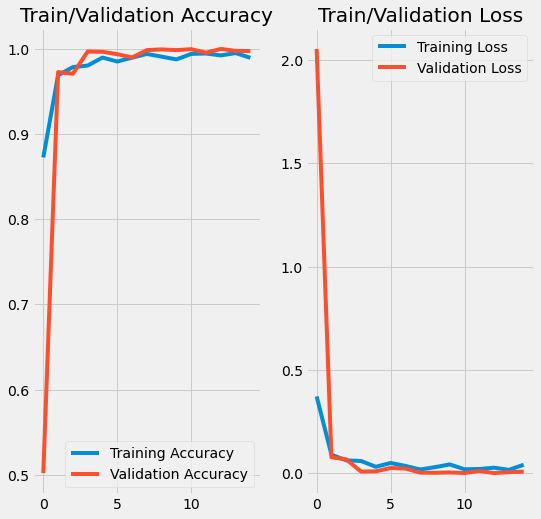

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train/Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train/Validation Loss')
plt.show()

In [9]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/MNISTDeeper.h5')

In [ ]:
test_probabilities = model.predict(test_ds)

 15/113 [==>...........................] - ETA: 5:46

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels)
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(correct_labels, predicted_labels)

print(report)

## **3. EXPLEINABILITY OF THE MODEL**

Contents
1.   Visualize intermediate activations
2.   Visualize Convnet filters


1.**Visualizing intermediate activations**

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/MNISTDeeper.h5')

In [ ]:
img_path = "/content/drive/MyDrive/NEURALNETWORK/DatasetNN/train/2L/fff79b8e-4d29-4cfa-bba8-687ba60f4e98_2L.png"
img = image.load_img(img_path, target_size=(128,128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)

In [ ]:
plt.imshow(img_tensor[0].astype('uint8'))
plt.show()

Code below defines a loop over the layers of a Keras model model, and appends the outputs and names of those layers that are either Conv2D or MaxPooling2D instances to the lists layer_outputs and layer_names, respectively. The keras.Model constructor is then called to create a new model called activation_model that has the same input as model and outputs as the selected layer outputs from layer_outputs.

In [ ]:
layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(layer.name)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)
print(len(activations))
for out in activations:
  print(out.shape)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(32, 16))
for k in range(8):
    ax[0, k].matshow(first_layer_activation[0, :, :, k], cmap='gray')
    ax[1, k].matshow(first_layer_activation[0, :, :, k+8], cmap='gray')
    ax[2, k].matshow(first_layer_activation[0, :, :, k+16], cmap='gray')
    ax[3, k].matshow(first_layer_activation[0, :, :, k+24], cmap='gray')
plt.show()

In [ ]:
images_per_row = 16
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')
plt.show()

**2. Visualize Convnet filters**

In [ ]:
model.summary()

for layer in model.layers:
  if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
    print(layer.name)

layer_name = "conv2d_5"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

# Normalize the pixel values to the range [0, 1]
img_tensor = img_tensor / 255.0

# Subtract the mean pixel value from the image tensor
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img_tensor = (img_tensor - mean) / std


# Pass the preprocessed image tensor to the model for predictions
activation = feature_extractor(img_tensor)

Code below defines a function compute_loss that computes the loss for gradient ascent on an input image tensor. It does this by first getting a specific layer from the model using the layer_name argument and the get_layer method of the model. A feature extractor model is then created using the Keras Model constructor and this layer's output as the output of the new model. The activation of the layer on the input image is then computed using the feature extractor model and stored in the activation variable. The activation values for a specific filter, specified by the filter_index argument, are then selected from the activation tensor and stored in filter_activation. Finally, the mean activation value of the filter is computed using tf.reduce_mean and returned as the result of the function.

In [ ]:
def compute_loss(image, layer_name, filter_index):
  ''' compute loss for gradient ascent
  
  image: input image tensor
  layer_name: name of the conv layer we are considering
  filter index: index of the filter we are considering (i.e., feature map of the output of a given conv layer) 
  '''
  layer = model.get_layer(name=layer_name)
  feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)
  activation = feature_extractor(image)
  filter_activation = activation[:, 2:-2, 2:-2, filter_index] # avoid border artifacts
  return tf.reduce_mean(filter_activation) # return mean activation values for the filter

Code below defines a function gradient_ascent_step that performs a single step of gradient ascent on the input image tensor. The function takes as input the image tensor, the name of the layer to perform gradient ascent on, the index of the filter to focus on, and the learning rate.

The function uses TensorFlow's GradientTape to record operations that are performed within its scope. The image tensor is explicitly watched using the tape.watch method, as it is not a TensorFlow Variable and would not be automatically watched in a gradient tape. The loss is then computed using the compute_loss function with the image, layer_name, and filter_index arguments.

Outside the GradientTape scope, the gradients of the loss with respect to the image tensor are computed using tape.gradient and stored in the grads variable. The gradients are then normalized using tf.math.l2_normalize. Finally, the image tensor is updated by adding the product of the learning rate and the normalized gradients to it, and the updated image tensor is returned as the result of the function.

In [ ]:
def gradient_ascent_step(image, layer_name, filter_index, learning_rate):
    with tf.GradientTape() as tape: # inside the scope, perform some tensor operations
        tape.watch(image) # Explicitly watch the image tensor, since it isn’t a TensorFlow Variable (only Variables are automatically watched in a gradient tape).
        loss = compute_loss(image, layer_name, filter_index) # how much the current image activates the filter.
    # then, outside the scope, retrieve the gradients based on the "recorded" variables
    grads = tape.gradient(loss, image) # Compute the gradients of the loss with respect to the image.
    grads = tf.math.l2_normalize(grads) # gradient normalization trick
    image += learning_rate * grads # Move the image a little bit in a direction that activates our target filter more strongly.
    return image

Code below defines a function generate_filter_pattern which generates an image that represents the pattern of a particular filter of a convolutional layer in a deep neural network.

The function takes two arguments as input: layer_name which is the name of the layer to generate the filter pattern for, and filter_index which is the index of the filter to focus on.

The function starts by initializing an image tensor with random values in the range centered in 0.5 and with dimensions (1, img_width, img_height, 3). It then performs gradient ascent on the image tensor using the gradient_ascent_step function for 30 iterations with a learning rate of 10.

After the gradient ascent, the image tensor is converted to a numpy array and returned as the result of the function. The returned image represents the pattern of the filter at the specified layer and index.

In [ ]:
img_width = 128
img_height = 128

def generate_filter_pattern(layer_name, filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform( # initialize an image tensor with random values in the range centered in 0.5
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, 3))
    for i in range(iterations):
        image = gradient_ascent_step(image, layer_name, filter_index, learning_rate)
    return image[0].numpy()

Code belowdefines a function deprocess_image which takes an image tensor as input and returns a processed image. The purpose of the processing is to bring the image data back to a format that is displayable.

The function subtracts the mean of the image tensor, then divides it by the standard deviation, multiplies it by 64, adds 128 and clips the pixel values between 0 and 255. Finally, it removes 25 pixels from each border of the image to avoid border artifacts. The result is then cast to an unsigned 8-bit integer and returned.

In [ ]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :] #avoid border artifacts
    return image

In [ ]:
all_images = []
for filter_index in range(16):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(
        generate_filter_pattern(layer_name, filter_index)
    )
    all_images.append(image)

margin = 5
n = 4
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image

In [ ]:
plt.figure(figsize=(10, 10))
plt.title(layer_name)
plt.imshow(stitched_filters.astype("uint8"))
plt.show()

### **HYPERTUNING DEEPER MINST CNN**

Sections
1.   Second CNN Hypertuning
2.   Results plot
3.   Explenabilty of the model


1. SECOND CNN HYPERTUNING
The model uses hyperparameters (hp) to define certain aspects of the model that can be tuned. The number of units in the dense layer, the activation function used in the dense layer, whether to use dropout, and the learning rate of the optimizer are all defined as hyperparameters. The model uses the categorical cross-entropy loss function and the accuracy metric to compile the model. The optimizer used is Adam with a learning rate that can be defined as a hyperparameter.

In [16]:
def build_model(hp):
    model = keras.Sequential()
    model = keras.models.Sequential()
    model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model.add(keras.layers.RandomFlip("horizontal_and_vertical"))
    model.add(keras.layers.RandomRotation(0.2))
    model.add(keras.layers.RandomCrop(120,110))
    model.add(keras.layers.RandomZoom(0.5,fill_mode='reflect',interpolation='bilinear'))
    model.add(keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu', input_shape = [128, 128,3]))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())
    model.add(
        keras.layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(12, activation="softmax"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [17]:
build_model(kt.HyperParameters())

In [18]:
import datetime
# Create permanent folder in Google Drive
my_dir = "/content/drive/MyDrive/NEURALNETWORK/HyperTuning"
if not os.path.exists(my_dir):
  os.makedirs(my_dir)
log_dir = my_dir + "/logs/" + datetime.datetime.now().strftime("%m%d-%H%M")

In [19]:
import tensorboard

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory=log_dir,
    project_name="MNISTDeepTuning",
)

tensorboard = keras.callbacks.TensorBoard(log_dir)

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [21]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_ds,batch_size=64,validation_data=val_ds,epochs=5,verbose = 1,callbacks=[stop_early])

Trial 1 Complete [02h 10m 25s]
val_accuracy: 0.5474999845027924

Best val_accuracy So Far: 0.5474999845027924
Total elapsed time: 02h 10m 25s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
512               |192               |units
tanh              |relu              |activation
True              |False             |dropout
0.00018983        |0.00039683        |lr

Epoch 1/5
450/450 [==============================] - 768s 2s/step - loss: 1.8568 - accuracy: 0.2872 - val_loss: 4.1874 - val_accuracy: 0.1036
Epoch 2/5
450/450 [==============================] - 763s 2s/step - loss: 1.3120 - accuracy: 0.3986 - val_loss: 1.1600 - val_accuracy: 0.5033
Epoch 3/5
450/450 [==============================] - 761s 2s/step - loss: 1.1021 - accuracy: 0.4348 - val_loss: 1.5271 - val_accuracy: 0.2761
Epoch 4/5
450/450 [==============================] - 762s 2s/step - loss: 1.0087 - accuracy: 0.4554 - val_loss: 0.7741 - val_accuracy: 0.4961
Epoch 5/5
450/450 [==========

In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(128,128,3))
best_model.summary()

In [ ]:
tuner.results_summary()

In [ ]:
#here with the entire dataset
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])
# Fit with the entire dataset.
history = model.fit(x=train_ds, y=val_ds, epochs=5)

In [ ]:
model.save('/content/drive/MyDrive/NEURALNETWORK/Models/IIMNISTFineTuned.h5')

## **2. RESULTS PLOT**


> Contents

1.   Epoch-Accuracy plot considering the loss
2.   Confusion Matrix
3.   Area under the ROC Curve for each class



In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train/Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train/Validation Loss')
plt.show()

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/IIMNISTFineTuned.h5')

In [ ]:
test_probabilities = model.predict(test_ds)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels)
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [ ]:
from sklearn.metrics import roc_curve,auc


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(12):
    fpr[i], tpr[i], _ = roc_curve(correct_labels, predicted_labels,pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(12):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+str(classes[i]))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(correct_labels, predicted_labels)

print(report)

## **3. EXPLEINABILITY OF THE MODEL**

Contents
1.   Visualize intermediate activations
2.   Visualize Convnet filters


**1. Visualize intermediate activations**

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/IIMNISTFineTuned.h5')

In [ ]:
img_path = "/content/drive/MyDrive/NEURALNETWORK/DatasetNN/train/2L/fff79b8e-4d29-4cfa-bba8-687ba60f4e98_2L.png"
img = image.load_img(img_path, target_size=(128,128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)

In [ ]:
plt.imshow(img_tensor[0].astype('uint8'))
plt.show()

Code below defines a loop over the layers of a Keras model model, and appends the outputs and names of those layers that are either Conv2D or MaxPooling2D instances to the lists layer_outputs and layer_names, respectively. The keras.Model constructor is then called to create a new model called activation_model that has the same input as model and outputs as the selected layer outputs from layer_outputs.

In [ ]:
layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(layer.name)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)
print(len(activations))
for out in activations:
  print(out.shape)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(32, 16))
for k in range(8):
    ax[0, k].matshow(first_layer_activation[0, :, :, k], cmap='gray')
    ax[1, k].matshow(first_layer_activation[0, :, :, k+8], cmap='gray')
    ax[2, k].matshow(first_layer_activation[0, :, :, k+16], cmap='gray')
    ax[3, k].matshow(first_layer_activation[0, :, :, k+24], cmap='gray')
plt.show()

In [ ]:
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

**2. Visualize Convnet filters**

In [ ]:
model.summary()

for layer in model.layers:
  if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
    print(layer.name)

layer_name = "conv2d_3"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

# Normalize the pixel values to the range [0, 1]
img_tensor = img_tensor / 255.0

# Subtract the mean pixel value from the image tensor
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img_tensor = (img_tensor - mean) / std


# Pass the preprocessed image tensor to the model for predictions
activation = feature_extractor(img_tensor)

Code below defines a function compute_loss that computes the loss for gradient ascent on an input image tensor. It does this by first getting a specific layer from the model using the layer_name argument and the get_layer method of the model. A feature extractor model is then created using the Keras Model constructor and this layer's output as the output of the new model. The activation of the layer on the input image is then computed using the feature extractor model and stored in the activation variable. The activation values for a specific filter, specified by the filter_index argument, are then selected from the activation tensor and stored in filter_activation. Finally, the mean activation value of the filter is computed using tf.reduce_mean and returned as the result of the function.

In [ ]:
import tensorflow as tf

def compute_loss(image, layer_name, filter_index):
  ''' compute loss for gradient ascent
  
  image: input image tensor
  layer_name: name of the conv layer we are considering
  filter index: index of the filter we are considering (i.e., feature map of the output of a given conv layer) 
  '''
  layer = model.get_layer(name=layer_name)
  feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)
  activation = feature_extractor(image)
  filter_activation = activation[:, 2:-2, 2:-2, filter_index] # avoid border artifacts
  return tf.reduce_mean(filter_activation) # return mean activation values for the filter

Code below defines a function gradient_ascent_step that performs a single step of gradient ascent on the input image tensor. The function takes as input the image tensor, the name of the layer to perform gradient ascent on, the index of the filter to focus on, and the learning rate.

The function uses TensorFlow's GradientTape to record operations that are performed within its scope. The image tensor is explicitly watched using the tape.watch method, as it is not a TensorFlow Variable and would not be automatically watched in a gradient tape. The loss is then computed using the compute_loss function with the image, layer_name, and filter_index arguments.

Outside the GradientTape scope, the gradients of the loss with respect to the image tensor are computed using tape.gradient and stored in the grads variable. The gradients are then normalized using tf.math.l2_normalize. Finally, the image tensor is updated by adding the product of the learning rate and the normalized gradients to it, and the updated image tensor is returned as the result of the function.

In [ ]:
def gradient_ascent_step(image, layer_name, filter_index, learning_rate):
    with tf.GradientTape() as tape: # inside the scope, perform some tensor operations
        tape.watch(image) # Explicitly watch the image tensor, since it isn’t a TensorFlow Variable (only Variables are automatically watched in a gradient tape).
        loss = compute_loss(image, layer_name, filter_index) # how much the current image activates the filter.
    # then, outside the scope, retrieve the gradients based on the "recorded" variables
    grads = tape.gradient(loss, image) # Compute the gradients of the loss with respect to the image.
    grads = tf.math.l2_normalize(grads) # gradient normalization trick
    image += learning_rate * grads # Move the image a little bit in a direction that activates our target filter more strongly.
    return image

Code below defines a function generate_filter_pattern which generates an image that represents the pattern of a particular filter of a convolutional layer in a deep neural network.

The function takes two arguments as input: layer_name which is the name of the layer to generate the filter pattern for, and filter_index which is the index of the filter to focus on.

The function starts by initializing an image tensor with random values in the range centered in 0.5 and with dimensions (1, img_width, img_height, 3). It then performs gradient ascent on the image tensor using the gradient_ascent_step function for 30 iterations with a learning rate of 10.

After the gradient ascent, the image tensor is converted to a numpy array and returned as the result of the function. The returned image represents the pattern of the filter at the specified layer and index.

In [ ]:
img_width = 128
img_height = 128

def generate_filter_pattern(layer_name, filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform( # initialize an image tensor with random values in the range centered in 0.5
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, 3))
    for i in range(iterations):
        image = gradient_ascent_step(image, layer_name, filter_index, learning_rate)
    return image[0].numpy()

Code below defines a function deprocess_image which takes an image tensor as input and returns a processed image. The purpose of the processing is to bring the image data back to a format that is displayable.

The function subtracts the mean of the image tensor, then divides it by the standard deviation, multiplies it by 64, adds 128 and clips the pixel values between 0 and 255. Finally, it removes 25 pixels from each border of the image to avoid border artifacts. The result is then cast to an unsigned 8-bit integer and returned.

In [ ]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :] #avoid border artifacts
    return image

In [ ]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(layer_name, filter_index=2)))

In [ ]:
plt.figure(figsize=(10, 10))
plt.title(layer_name)
plt.imshow(stitched_filters.astype("uint8"))
plt.show()

### **THIRD IMPLEMENTATION: RESNET-18 (pretrained)**

Sections
1.   ResNet-18 Instantiation
1.   No data augmentation with Adam
2.   No data augmentation with SGD
3.   Data augmentation with Adam
4.   Data augmentation with SGD
3.   ResNet-18 hypertuning with Adam
6.   ResNet-18 hypertuning with SGD

**1 RESNET-18 IMPLEMENTATION**

**NO DATA AUGMENTATION WITH ADAM**

In [ ]:
from keras.applications.resnet import ResNet18
resnet_base = ResNet18(weights='imagenet', include_top=False, input_shape=(128,128,3))
print("Trainable weights", len(resnet_base.trainable_weights))
resnet_base.summary()

In [ ]:
def extract_features_with_resnet(image, label):
    image = tf.keras.applications.resnet.preprocess_input(image)
    features = resnet_base(image, training=False)
    return features, label

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    image_size=(128,128,3),
    batch_size=32,
    validation_split=0.2,
    seed=42,
    shuffle=True,
    preprocessing_fn=extract_features_with_resnet
)


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    train,
    image_size=(128,128,3),
    batch_size=32,
    validation_split=0.2,
    seed=42,
    shuffle=True,
    preprocessing_fn=extract_features_with_resnet
)

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  validation_split=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(1,1,512))
x = layers.BatchNormalization()(inputs)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(12, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.2,min_lr=0.000001)

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_without_data_augmentation.keras",
 save_best_only=True,
 monitor="val_loss"),
 learning_rate_reduction
]

history = model.fit(train_ds,batch_size = 32,validation_data=val_ds,epochs=15,verbose = 1, callbacks=callbacks)

In [ ]:
model.save('/content/drive/MyDrive/NEURALNETWORK/Models/AdamNoDataAugmentationRESNET18.h5') 

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train/Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train/Validation Loss')
plt.show()

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/AdamNoDataAugmentationRESNET18.h5')

In [ ]:
test_probabilities = model.predict(test_ds)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels)
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [ ]:
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

**NO DATA AUGMENTATION WITH SGD**

In [ ]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(1,1,512))
x = layers.BatchNormalization()(inputs)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(12, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.2,min_lr=0.000001)

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_without_data_augmentation.keras",
 save_best_only=True,
 monitor="val_loss"),
 learning_rate_reduction
]

history = model.fit(train_ds,batch_size = 32,validation_data=val_ds,epochs=15,verbose = 1, callbacks=callbacks)

In [ ]:
model.save('/content/drive/MyDrive/NEURALNETWORK/Models/SGDNoDataAugmentationRESNET18.h5') 

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train/Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train/Validation Loss')
plt.show()

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/SGDNoDataAugmentationRESNET18.h5')

In [ ]:
test_probabilities = model.predict(test_ds)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels)
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [ ]:
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

**DATA AUGMENTATION WITH ADAM OPTIMIZER**

In [ ]:
data_augmentation = keras.Sequential(
    [
         layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))
         layers.RandomRotation(0.2)
         layers.RandomZoom(0.5,fill_mode='reflect',interpolation='bilinear')
    ]
)

inputs = keras.Input(shape=(128,128,3))
x = data_augmentation(inputs, training=True) # apply data augmentation
x = keras.applications.resnet.preprocess_input(x) # apply input value scaling
x = resnet_base(x) 
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(12, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.2,min_lr=0.000001)

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_without_data_augmentation.keras",
 save_best_only=True,
 monitor="val_loss"),
 learning_rate_reduction
]

history = model.fit(train_ds,batch_size = 32,validation_data=val_ds,epochs=15,verbose = 1, callbacks=callbacks)

In [ ]:
model.save('/content/drive/MyDrive/NEURALNETWORK/Models/AdamWithDataAugmentationRESNET18.h5') 

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train/Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train/Validation Loss')
plt.show()

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/AdamWithDataAugmentationRESNET18.h5')

In [ ]:
test_probabilities = model.predict(test_ds)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels)
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [ ]:
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

**DATA AUGMENTATION WITH SGD**

In [ ]:
data_augmentation = keras.Sequential(
    [
         layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))
         layers.RandomRotation(0.2)
         layers.RandomZoom(0.5,fill_mode='reflect',interpolation='bilinear')
    ]
)


inputs = keras.Input(shape=(128,128,3))
x = data_augmentation(inputs, training=True) # apply data augmentation
x = keras.applications.resnet.preprocess_input(x) # apply input value scaling
x = resnet_base(x) 
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(12, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.2,min_lr=0.000001)

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_without_data_augmentation.keras",
 save_best_only=True,
 monitor="val_loss"),
 learning_rate_reduction
]

history = model.fit(train_ds,batch_size = 32,validation_data=val_ds,epochs=15,verbose = 1, callbacks=callbacks)

In [ ]:
model.save('/content/drive/MyDrive/NEURALNETWORK/Models/SGDWithDataAugmentationRESNET18.h5') 

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels)
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/SGDWithDataAugmentationRESNET18.h5')

In [ ]:
test_probabilities = model.predict(test_ds)

In [ ]:
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

**HYPERTUNING WITH ADAM**

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model = keras.models.Sequential()
    model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model.add(keras.layers.RandomFlip("horizontal_and_vertical"))
    model.add(keras.layers.RandomRotation(0.2))
    model.add(keras.layers.RandomCrop(120,110))
    model.add(keras.layers.RandomZoom(0.5,fill_mode='reflect',interpolation='bilinear'))
    model.add(keras.applications.resnet.preprocess_input())
    model.add(resnet_base())
    model.add(keras.layers.Flatten())
    model.add(
        keras.layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(12, activation="softmax"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [ ]:
build_model(kt.HyperParameters())

In [ ]:
import datetime
# Create permanent folder in Google Drive
my_dir = "/content/drive/MyDrive/NEURALNETWORK/HyperTuning"
if not os.path.exists(my_dir):
  os.makedirs(my_dir)
log_dir = my_dir + "/logs/" + datetime.datetime.now().strftime("%m%d-%H%M")

In [ ]:
import tensorboard

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory=log_dir,
    project_name="RESNETAdamDeepTuning",
)

tensorboard = keras.callbacks.TensorBoard(log_dir)

In [ ]:
tuner.search_space_summary()

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_ds,batch_size=64,validation_data=val_ds,epochs=5,verbose = 1,callbacks=[stop_early])

In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(128,128,3))
best_model.summary()

In [ ]:
tuner.results_summary()

In [ ]:
model.save('/content/drive/MyDrive/NEURALNETWORK/Models/AdamResNet18FineTuned.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train/Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train/Validation Loss')
plt.show()

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/AdamResNet18FineTuned.h5')

In [ ]:
test_probabilities = model.predict(test_ds)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels)
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [ ]:
from sklearn.metrics import roc_curve,auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(12):
    fpr[i], tpr[i], _ = roc_curve(correct_labels, predicted_labels,pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(12):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+str(classes[i]))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(correct_labels, predicted_labels)

print(report)

In [ ]:
img_path = "/content/drive/MyDrive/NEURALNETWORK/DatasetNN/train/2L/fff79b8e-4d29-4cfa-bba8-687ba60f4e98_2L.png"
img = image.load_img(img_path, target_size=(128,128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)

In [ ]:
model.summary()

for layer in model.layers:
  if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
    print(layer.name)

layer_name = "conv2d_3"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

activation = feature_extractor(
    model.preprocess_input(img_tensor)
)

In [ ]:
import tensorflow as tf

def compute_loss(image, layer_name, filter_index):
  ''' compute loss for gradient ascent
  
  image: input image tensor
  layer_name: name of the conv layer we are considering
  filter index: index of the filter we are considering (i.e., feature map of the output of a given conv layer) 
  '''
  layer = model.get_layer(name=layer_name)
  feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)
  activation = feature_extractor(image)
  filter_activation = activation[:, 2:-2, 2:-2, filter_index] # avoid border artifacts
  return tf.reduce_mean(filter_activation) # return mean activation values for the filter

In [ ]:
layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(layer.name)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)
print(len(activations))
for out in activations:
  print(out.shape)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(32, 16))
for k in range(8):
    ax[0, k].matshow(first_layer_activation[0, :, :, k], cmap='gray')
    ax[1, k].matshow(first_layer_activation[0, :, :, k+8], cmap='gray')
    ax[2, k].matshow(first_layer_activation[0, :, :, k+16], cmap='gray')
    ax[3, k].matshow(first_layer_activation[0, :, :, k+24], cmap='gray')
plt.show()

In [ ]:
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

In [ ]:
model.summary()

for layer in model.layers:
  if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
    print(layer.name)

layer_name = "conv2d_3"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

# Normalize the pixel values to the range [0, 1]
img_tensor = img_tensor / 255.0

# Subtract the mean pixel value from the image tensor
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img_tensor = (img_tensor - mean) / std


# Pass the preprocessed image tensor to the model for predictions
activation = feature_extractor(img_tensor)

In [ ]:
import tensorflow as tf

def compute_loss(image, layer_name, filter_index):
  ''' compute loss for gradient ascent
  
  image: input image tensor
  layer_name: name of the conv layer we are considering
  filter index: index of the filter we are considering (i.e., feature map of the output of a given conv layer) 
  '''
  layer = model.get_layer(name=layer_name)
  feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)
  activation = feature_extractor(image)
  filter_activation = activation[:, 2:-2, 2:-2, filter_index] # avoid border artifacts
  return tf.reduce_mean(filter_activation) # return mean activation values for the filter

In [ ]:
def gradient_ascent_step(image, layer_name, filter_index, learning_rate):
    with tf.GradientTape() as tape: # inside the scope, perform some tensor operations
        tape.watch(image) # Explicitly watch the image tensor, since it isn’t a TensorFlow Variable (only Variables are automatically watched in a gradient tape).
        loss = compute_loss(image, layer_name, filter_index) # how much the current image activates the filter.
    # then, outside the scope, retrieve the gradients based on the "recorded" variables
    grads = tape.gradient(loss, image) # Compute the gradients of the loss with respect to the image.
    grads = tf.math.l2_normalize(grads) # gradient normalization trick
    image += learning_rate * grads # Move the image a little bit in a direction that activates our target filter more strongly.
    return image

In [ ]:
img_width = 128
img_height = 128

def generate_filter_pattern(layer_name, filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform( # initialize an image tensor with random values in the range centered in 0.5
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, 3))
    for i in range(iterations):
        image = gradient_ascent_step(image, layer_name, filter_index, learning_rate)
    return image[0].numpy()

In [ ]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :] #avoid border artifacts
    return image

In [ ]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(layer_name, filter_index=2)))

In [ ]:
plt.figure(figsize=(10, 10))
plt.title(layer_name)
plt.imshow(stitched_filters.astype("uint8"))
plt.show()

**HYPERTUNING WITH SGD**

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model = keras.models.Sequential()
    model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model.add(keras.layers.RandomRotation(0.2))
    model.add(keras.layers.RandomZoom(0.5,fill_mode='reflect',interpolation='bilinear'))
    model.add(keras.applications.resnet.preprocess_input())
    model.add(resnet_base())
    model.add(keras.layers.Flatten())
    model.add(
        keras.layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(12, activation="softmax"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [ ]:
build_model(kt.HyperParameters())

In [ ]:
import datetime
# Create permanent folder in Google Drive
my_dir = "/content/drive/MyDrive/NEURALNETWORK/HyperTuning"
if not os.path.exists(my_dir):
  os.makedirs(my_dir)
log_dir = my_dir + "/logs/" + datetime.datetime.now().strftime("%m%d-%H%M")

In [ ]:
import tensorboard

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory=log_dir,
    project_name="RESNETSGDTuning",
)

tensorboard = keras.callbacks.TensorBoard(log_dir)

In [ ]:
tuner.search_space_summary()

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_ds,batch_size=64,validation_data=val_ds,epochs=5,verbose = 1,callbacks=[stop_early])

In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(128,128,3))
best_model.summary()

In [ ]:
tuner.results_summary()

In [ ]:
model.save('/content/drive/MyDrive/NEURALNETWORK/Models/SGDResNet18FineTuned.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train/Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train/Validation Loss')
plt.show()

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/NEURALNETWORK/Models/SGDResNet18FineTuned.h5')

In [ ]:
test_probabilities = model.predict(test_ds)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(correct_labels, predicted_labels)
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [ ]:
from sklearn.metrics import roc_curve,auc


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(12):
    fpr[i], tpr[i], _ = roc_curve(correct_labels, predicted_labels,pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(12):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+str(classes[i]))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(correct_labels, predicted_labels)

print(report)

In [ ]:
img_path = "/content/drive/MyDrive/NEURALNETWORK/DatasetNN/train/2L/fff79b8e-4d29-4cfa-bba8-687ba60f4e98_2L.png"
img = image.load_img(img_path, target_size=(128,128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)

In [ ]:
model.summary()

for layer in model.layers:
  if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
    print(layer.name)

layer_name = "conv2d_3"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

# Normalize the pixel values to the range [0, 1]
img_tensor = img_tensor / 255.0

# Subtract the mean pixel value from the image tensor
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img_tensor = (img_tensor - mean) / std


# Pass the preprocessed image tensor to the model for predictions
activation = feature_extractor(img_tensor)

In [ ]:
import tensorflow as tf

def compute_loss(image, layer_name, filter_index):
  ''' compute loss for gradient ascent
  
  image: input image tensor
  layer_name: name of the conv layer we are considering
  filter index: index of the filter we are considering (i.e., feature map of the output of a given conv layer) 
  '''
  layer = model.get_layer(name=layer_name)
  feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)
  activation = feature_extractor(image)
  filter_activation = activation[:, 2:-2, 2:-2, filter_index] # avoid border artifacts
  return tf.reduce_mean(filter_activation) # return mean activation values for the filter

In [ ]:
layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(layer.name)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)
print(len(activations))
for out in activations:
  print(out.shape)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(32, 16))
for k in range(8):
    ax[0, k].matshow(first_layer_activation[0, :, :, k], cmap='gray')
    ax[1, k].matshow(first_layer_activation[0, :, :, k+8], cmap='gray')
    ax[2, k].matshow(first_layer_activation[0, :, :, k+16], cmap='gray')
    ax[3, k].matshow(first_layer_activation[0, :, :, k+24], cmap='gray')
plt.show()

In [ ]:
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

In [ ]:
model.summary()

for layer in model.layers:
  if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
    print(layer.name)

layer_name = "conv2d_3"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

activation = feature_extractor(
    model.preprocess_input(img_tensor)
)

In [ ]:
import tensorflow as tf

def compute_loss(image, layer_name, filter_index):
  ''' compute loss for gradient ascent
  
  image: input image tensor
  layer_name: name of the conv layer we are considering
  filter index: index of the filter we are considering (i.e., feature map of the output of a given conv layer) 
  '''
  layer = model.get_layer(name=layer_name)
  feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)
  activation = feature_extractor(image)
  filter_activation = activation[:, 2:-2, 2:-2, filter_index] # avoid border artifacts
  return tf.reduce_mean(filter_activation) # return mean activation values for the filter

In [ ]:
def gradient_ascent_step(image, layer_name, filter_index, learning_rate):
    with tf.GradientTape() as tape: # inside the scope, perform some tensor operations
        tape.watch(image) # Explicitly watch the image tensor, since it isn’t a TensorFlow Variable (only Variables are automatically watched in a gradient tape).
        loss = compute_loss(image, layer_name, filter_index) # how much the current image activates the filter.
    # then, outside the scope, retrieve the gradients based on the "recorded" variables
    grads = tape.gradient(loss, image) # Compute the gradients of the loss with respect to the image.
    grads = tf.math.l2_normalize(grads) # gradient normalization trick
    image += learning_rate * grads # Move the image a little bit in a direction that activates our target filter more strongly.
    return image

In [ ]:
img_width = 128
img_height = 128

def generate_filter_pattern(layer_name, filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform( # initialize an image tensor with random values in the range centered in 0.5
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, 3))
    for i in range(iterations):
        image = gradient_ascent_step(image, layer_name, filter_index, learning_rate)
    return image[0].numpy()

In [ ]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :] #avoid border artifacts
    return image

In [ ]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(layer_name, filter_index=2)))

In [ ]:
plt.figure(figsize=(10, 10))
plt.title(layer_name)
plt.imshow(stitched_filters.astype("uint8"))
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()